# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = '../D4/data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [4]:
app_train["AMT_INCOME_TOTAL"]

0         202500.0
1         270000.0
2          67500.0
3         135000.0
4         121500.0
            ...   
307506    157500.0
307507     72000.0
307508    153000.0
307509    171000.0
307510    157500.0
Name: AMT_INCOME_TOTAL, Length: 307511, dtype: float64

In [5]:
print("看一下整體客戶的收入平均值: ", app_train["AMT_INCOME_TOTAL"].mean())
print("看一下整體客戶的收入標準差: ", app_train["AMT_INCOME_TOTAL"].std())
print("看一下整體客戶的最高收入: ", app_train["AMT_INCOME_TOTAL"].max())
print("看一下整體客戶的最高收入: ", app_train["AMT_INCOME_TOTAL"].min())

看一下整體客戶的收入平均值:  168797.9192969845
看一下整體客戶的收入標準差:  237123.14627885626
看一下整體客戶的最高收入:  117000000.0
看一下整體客戶的最高收入:  25650.0


In [6]:
print("利用pandas內建函式: \n", app_train["AMT_INCOME_TOTAL"].describe())

利用pandas內建函式: 
 count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


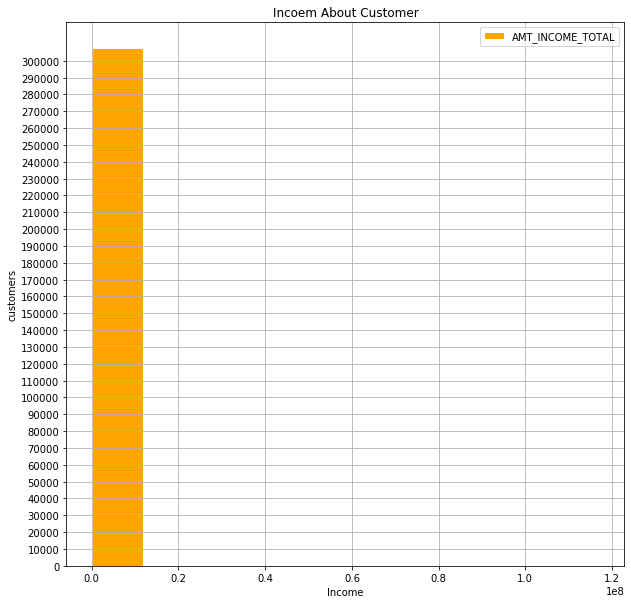

In [7]:
# bins = [ i for i in np.arange(0,1e8,1e5)] 先註解掉，到時在plt.hist內帶入bins=bins參數可調整...
plt.figure(figsize=(10,10))
plt.title("Incoem About Customer")
plt.xlabel("Income")
plt.ylabel("customers")
plt.yticks(range(0,app_train["AMT_INCOME_TOTAL"].shape[0],10000))
# plt.plot(app_train["AMT_INCOME_TOTAL"], label="AMT_INCOME_TOTAL")
plt.hist(app_train["AMT_INCOME_TOTAL"],color="orange",edgecolor="white",label="AMT_INCOME_TOTAL")
plt.grid(linestyle="-")
plt.legend()
plt.show()

0         202500.0
1         270000.0
2          67500.0
3         135000.0
4         121500.0
            ...   
307506    157500.0
307507     72000.0
307508    153000.0
307509    171000.0
307510    157500.0
Name: AMT_INCOME_TOTAL_QUANTILE_99, Length: 307511, dtype: float64


c:\users\gn026\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\gn026\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


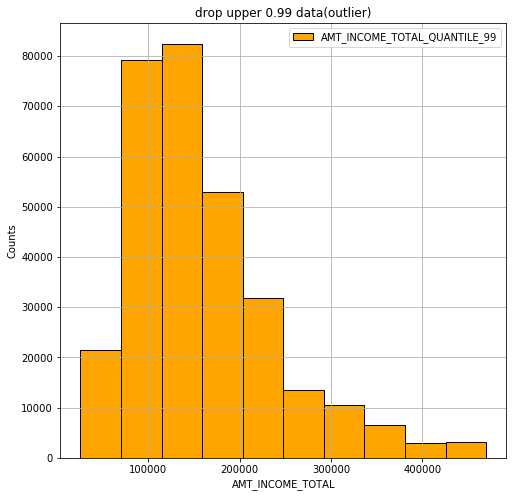

In [8]:
# 拿掉最大值看看
app_train["AMT_INCOME_TOTAL_QUANTILE_99"] = app_train[app_train["AMT_INCOME_TOTAL"]<app_train["AMT_INCOME_TOTAL"].quantile(0.99)]["AMT_INCOME_TOTAL"]
print(app_train["AMT_INCOME_TOTAL_QUANTILE_99"])

plt.figure(figsize=(8,8))
plt.clf()
plt.title("drop upper 0.99 data(outlier)")
plt.xlabel("AMT_INCOME_TOTAL")
plt.ylabel("Counts")
plt.hist(app_train["AMT_INCOME_TOTAL_QUANTILE_99"], color="orange",edgecolor="black", label="AMT_INCOME_TOTAL_QUANTILE_99")
plt.grid()
plt.legend()
plt.show()

In [9]:
print("利用pandas內建函式再看一次統計量: \n", app_train["AMT_INCOME_TOTAL_QUANTILE_99"].describe())

利用pandas內建函式再看一次統計量: 
 count    304417.000000
mean     162911.014841
std       77494.004409
min       25650.000000
25%      112500.000000
50%      144000.000000
75%      202500.000000
max      469800.000000
Name: AMT_INCOME_TOTAL_QUANTILE_99, dtype: float64
